In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [23]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [24]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [25]:
logs['platform'].describe()

count      4500
unique        3
top       phone
freq       2753
Name: platform, dtype: object

In [26]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [27]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [28]:
success_counts = logs.loc[logs.success == True].client.value_counts().sort_values(ascending=False)
success_counts

client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
99631     1
79886     1
78455     1
57026     1
40921     1
Name: count, Length: 2845, dtype: int64

In [29]:
max_num = success_counts.max()

In [30]:
max_success_users = success_counts.loc[success_counts == max_num]

In [31]:
max_success_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

In [32]:
success_counts2 = logs.loc[logs.success == True].platform.value_counts().idxmax()
success_counts2

'phone'

In [33]:
full_data = user_data.merge(logs, on='client')

In [34]:
full_data.loc[full_data.premium == True].platform.value_counts().idxmax()

'phone'

D:\Apps\Anaconda\envs\my_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


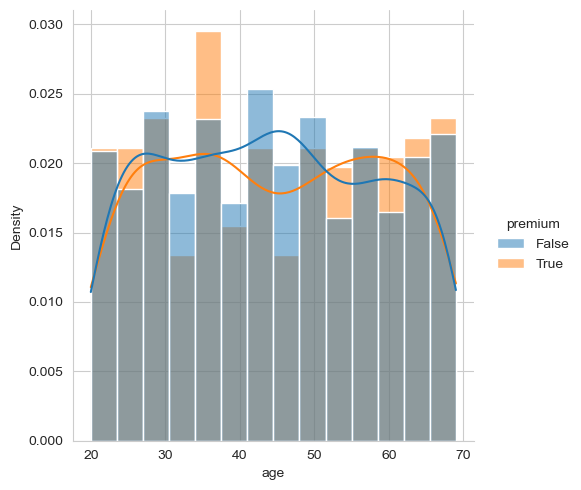

In [35]:
sns.displot(data=user_data, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False, bins=14)

In [36]:
success_counts3 = logs.loc[logs.success == True].client.value_counts().rename('successes')

<Axes: xlabel='successes', ylabel='count'>

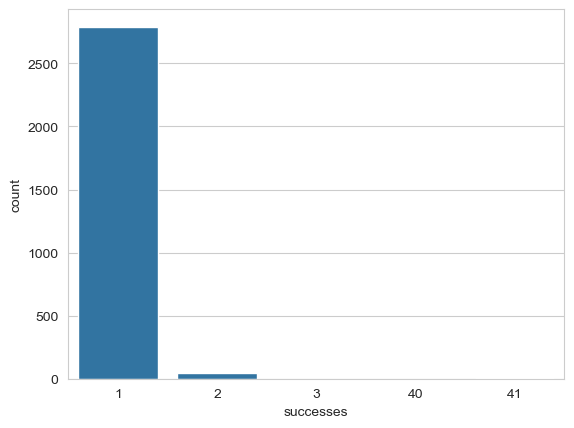

In [37]:
sns.countplot(x=success_counts3)

In [38]:
success_on_computer = full_data.loc[(full_data.success == True) & (full_data.platform == 'computer')]
success_on_computer

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


<Axes: xlabel='age', ylabel='count'>

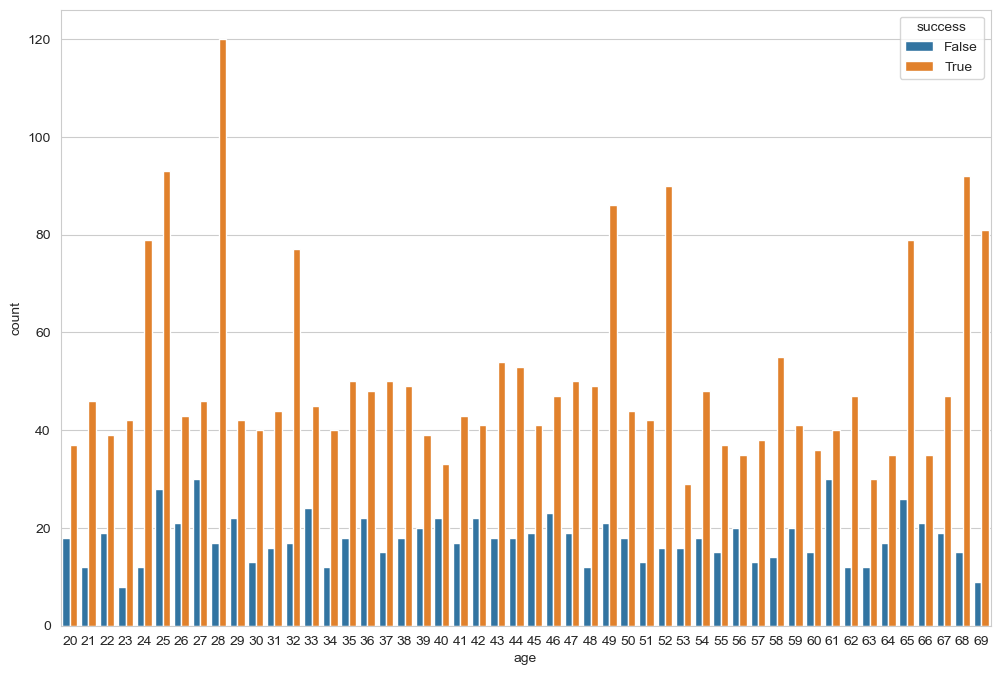

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(data=full_data, x='age', hue='success')